## Predicting NYC Airbnb Rental Prices

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_main = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df_main.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df_main.shape

(48895, 16)

In [5]:
# Checking for Null Values
df_main.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Replacing nulls in reviews per month by mean


In [7]:
# Checking for number of distinct hosts offering listings
len(df_main['host_name'].unique())

11453

In [8]:
len(df_main['name'].unique())

47906

In [9]:
# There are multiple listings for a single host
df_main['host_name'].value_counts()

Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Tessa & Negra      1
Fuchsia            1
Rahib              1
Marouene           1
Juan P             1
Name: host_name, Length: 11452, dtype: int64

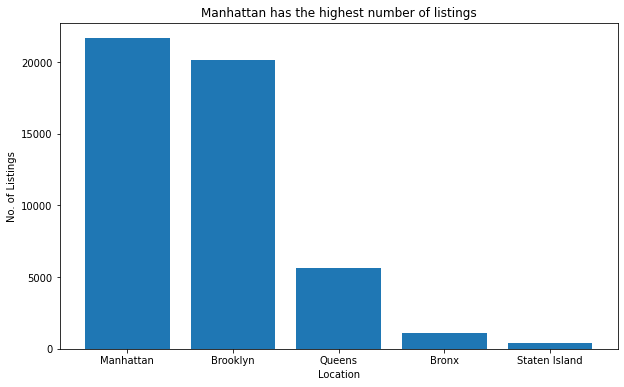

In [10]:
# Number of listings in a neighbourhood
nl = df_main['neighbourhood_group'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(nl.index,nl.values)
plt.xlabel("Location")
plt.ylabel("No. of Listings")
plt.title("Manhattan has the highest number of listings")
plt.show()


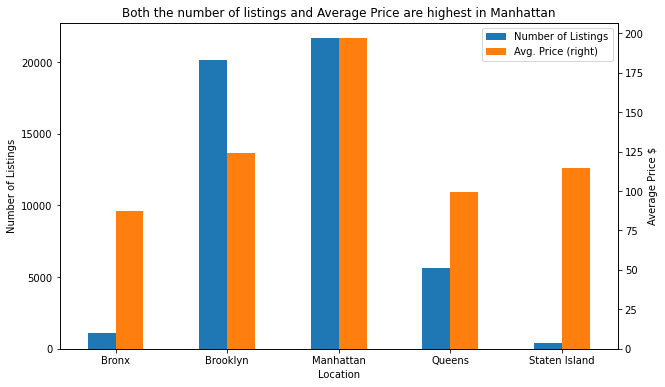

In [11]:
# Average listing price in a neighbourhood (location)
np = df_main.groupby(['neighbourhood_group']).mean()['price']
anp = pd.DataFrame({"Number of Listings":nl,"Avg. Price":np})

fig, ax = plt.subplots(figsize = (10, 6))
anp.plot(kind="bar",secondary_y="Avg. Price",rot=0,ax=ax)

ax.set_xlabel('Location')
ax.set_ylabel('Number of Listings')
ax.right_ax.set_ylabel('Average Price $')
plt.title('Both the number of listings and Average Price are highest in Manhattan')
plt.show()

In [12]:
# Room Types
set(df_main.room_type)

{'Entire home/apt', 'Private room', 'Shared room'}

In [13]:
df_main['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

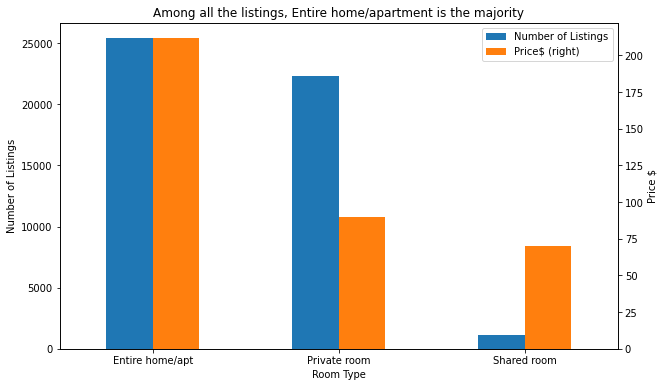

In [14]:
# Average listing price in a neighbourhood (location)
rt = df_main['room_type'].value_counts()
rp = df_main.groupby(['room_type']).mean()['price']
arp = pd.DataFrame({"Number of Listings":rt,"Price$":rp})

fig, ax = plt.subplots(figsize = (10, 6))
arp.plot(kind="bar",secondary_y="Price$",rot=0,ax=ax)

ax.set_xlabel('Room Type')
ax.set_ylabel('Number of Listings')
ax.right_ax.set_ylabel('Price $')
plt.title('Among all the listings, Entire home/apartment is the majority')

plt.show()

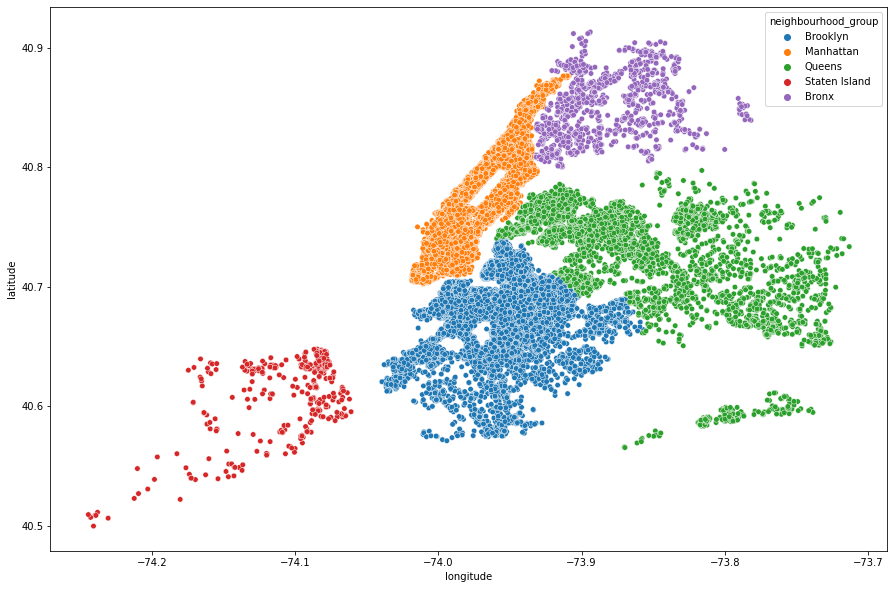

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=30, data=df_main)
plt.show()

In [16]:
anp = anp.reset_index()

In [17]:
anp.rename(columns={'index':'neighbourhood_group'},inplace=True)

In [18]:
! pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.6 MB/s 
     |████████████████████████████████| 15.4 MB 40.9 MB/s 


In [19]:
# Plot the listings on NY map
ny = gpd.read_file(gpd.datasets.get_path('nybb'))

In [20]:
ny.rename(columns={'BoroName':'neighbourhood_group'},inplace=True)

In [21]:
n_list = anp.merge(ny,on="neighbourhood_group")

In [22]:
n_list = gpd.GeoDataFrame(n_list)

In [23]:
n_list

,neighbourhood_group,Number of Listings,Avg. Price,BoroCode,Shape_Leng,Shape_Area,geometry
0,Bronx,1091,87.496792,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,Brooklyn,20104,124.383207,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
2,Manhattan,21661,196.875814,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,Queens,5666,99.517649,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
4,Staten Island,373,114.812332,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


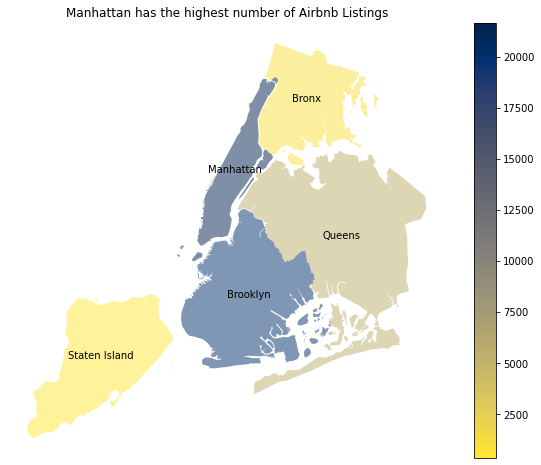

In [24]:
fig,ax = plt.subplots(1,1, figsize=(10,8))
n_list.plot(column='Number of Listings', cmap='cividis_r', alpha=.5, ax=ax, legend=True)
n_list.apply(lambda x: ax.annotate(s=x.neighbourhood_group, color='black', xy=x.geometry.centroid.coords[0],ha='center'), axis=1)
# n_list.apply(lambda x: ax.annotate(s=round(x['Avg. Price'],2), color='black', xy=x.geometry.centroid.coords[0],ha='right'), axis=1)
plt.title("Manhattan has the highest number of Airbnb Listings")
plt.axis('off')
plt.show()

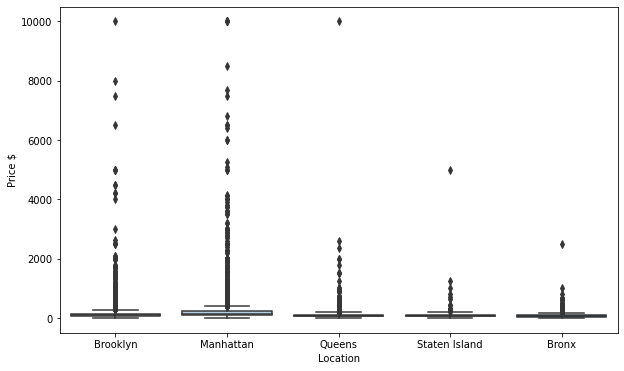

In [25]:
# Identifying Outliers borough wise
plt.figure(figsize=(10,6))
sns.boxplot(df_main['neighbourhood_group'],df_main['price'],palette='Blues')
plt.xlabel('Location')
plt.ylabel('Price $')
plt.show()

In [37]:
# Removing the outliers borough wise
df = df_main[df_main.groupby('neighbourhood_group').price.
             transform(lambda x : (x<x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25)))&(x>x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25)))).eq(1)]

In [39]:
# filling null values with median
df = df.fillna(df.median())

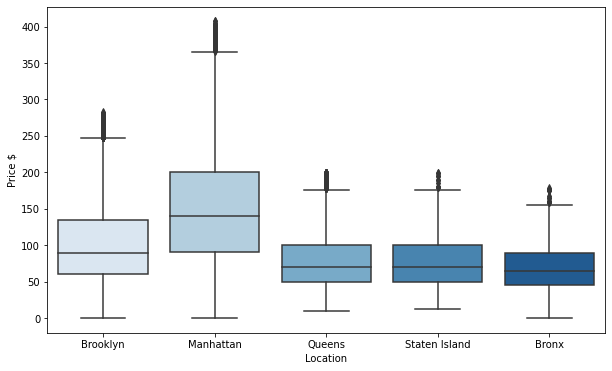

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(df['neighbourhood_group'],df['price'],palette='Blues')
plt.xlabel('Location')
plt.ylabel('Price $')
plt.show()

In [89]:
df_copy = df.copy()

In [90]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.71,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [91]:
# Dropping unnecessary columns
df_copy.drop(['name', 'host_id', 'host_name', 'id','last_review'], axis = 1, inplace = True)

In [92]:
df_copy.shape

(46087, 11)

In [93]:
df_copy = pd.get_dummies(df_copy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first = True)

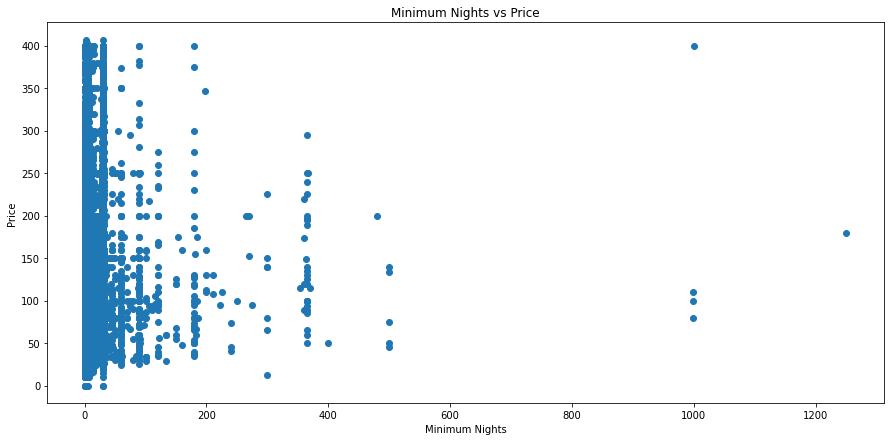

In [94]:
# To observe if there is any linear relationship between the target variable and independent variables
plt.figure(figsize=(15,7))
plt.scatter(df_copy['minimum_nights'],df_copy['price'])
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title("Minimum Nights vs Price")
plt.show()

## Modeling

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Independent variables
X = df_copy.drop(['price'], axis = 1)

# Dependent variable 
y = df_copy['price']

In [97]:
# Splitting the data into train and test in ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [98]:
X_train.shape

(36869, 229)

In [99]:
X_test.shape

(9218, 229)

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler = StandardScaler()

In [102]:
# Scaling the data to account for various ranges of independent variables
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train_scaled[0: 5]

array([[ 3.04635086e-01, -1.00978489e+00,  1.93841030e-03, ...,
        -7.04335526e-02, -9.57999650e-01, -1.59795981e-01],
       [-1.14491365e+00,  8.35576628e-01, -2.48472415e-01, ...,
        -7.04335526e-02, -9.57999650e-01, -1.59795981e-01],
       [-1.45163293e+00, -1.06581813e+00, -1.98390250e-01, ...,
        -7.04335526e-02, -9.57999650e-01, -1.59795981e-01],
       [-6.35715997e-01,  6.51436005e-01, -2.48472415e-01, ...,
        -7.04335526e-02,  1.04384172e+00, -1.59795981e-01],
       [-2.04214939e+00, -2.40261663e-01, -9.82259196e-02, ...,
        -7.04335526e-02, -9.57999650e-01, -1.59795981e-01]])

## Decision Tree Regressor

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [105]:
# getting best depth using cross validation score
max_depth_values = [2, 3, 4, 5, 8, 10, 12, 15]
cross_validation_error_values = []
cv = 10
for depth in tqdm(max_depth_values):
    model = DecisionTreeRegressor()
    cross_validation_error = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = cv).mean()
    cross_validation_error_values.append(cross_validation_error)

100%|██████████| 8/8 [00:56<00:00,  7.08s/it]


In [106]:
def lineplot_function_tree(x_value, y_value, font_size = 15):
    plt.figure(figsize = (10, 10))
    plt.plot(x_value, y_value)
    sns.scatterplot(x = x_value, y = y_value, color = 'red')
    plt.xlabel('Max Depth Values')
    plt.ylabel('Cross Validation Error Values')
    plt.title('Max Depth Values Vs Cross Validation Error Values', fontsize = font_size)
    plt.show()

In [107]:
cross_validation_error_values

[4403.605264151252,
 4380.562237347246,
 4375.826558404013,
 4406.060834558106,
 4386.402343601112,
 4405.071140746013,
 4370.787078737585,
 4368.846239982364]

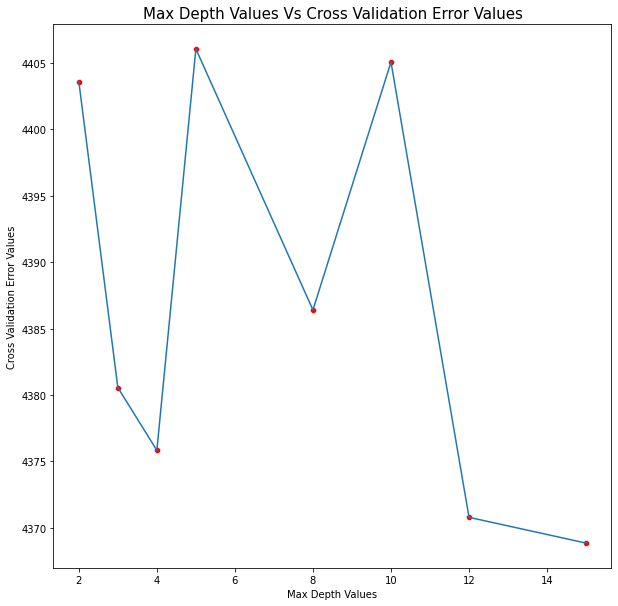

In [108]:
lineplot_function_tree(x_value = max_depth_values, y_value = cross_validation_error_values)

In [109]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
import seaborn as sns 
from sklearn import tree

In [110]:
best_max_depth = 2

In [111]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

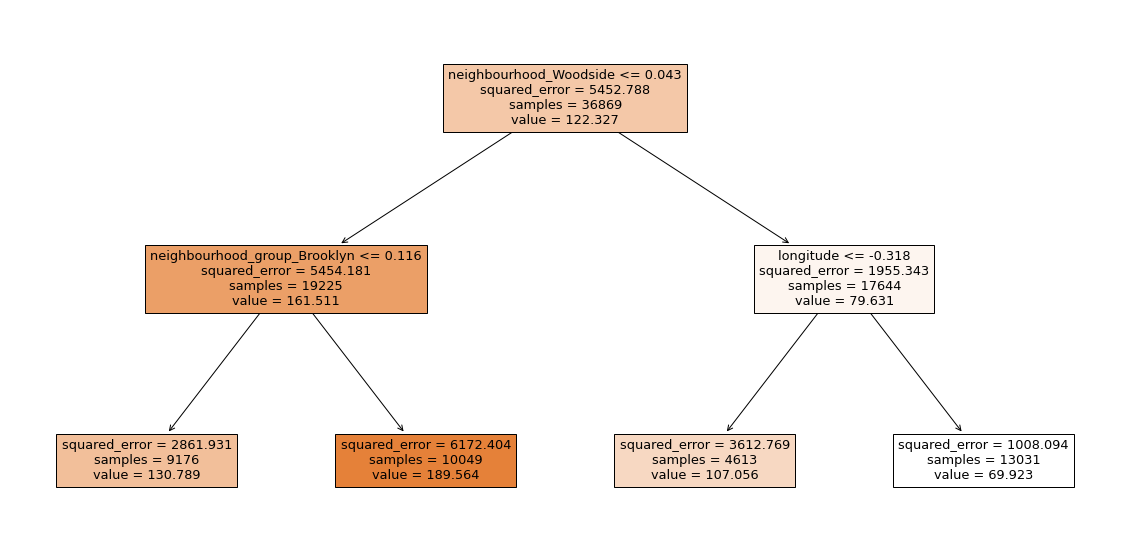

In [112]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model, filled = True, feature_names = df_copy.columns)
plt.show()

In [113]:
# getting best min samples leaf 
min_samples_leaf_values = [15, 25, 50, 100, 200, 400, 1000, 2000, 5000]
MSE_values = []
cv = 10
for min_samples_leaf in tqdm(min_samples_leaf_values):
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)   

100%|██████████| 9/9 [00:34<00:00,  3.88s/it]


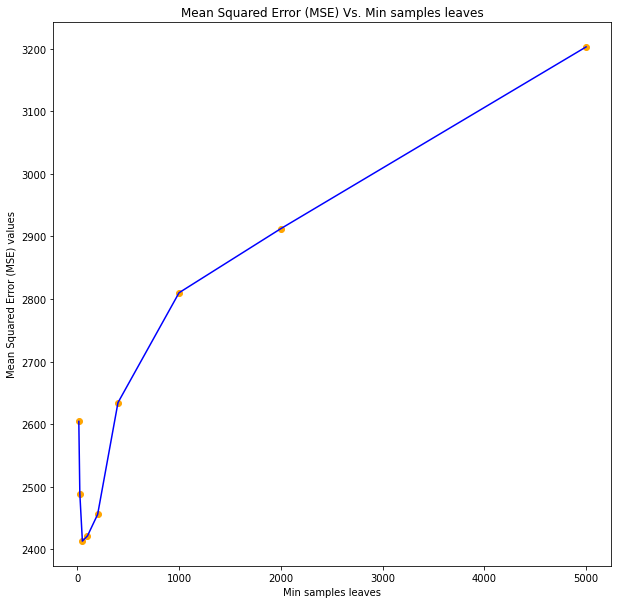

In [114]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_leaf_values, y = MSE_values, color = 'blue')
plt.scatter(x = min_samples_leaf_values, y = MSE_values, color = 'orange')
plt.xlabel("Min samples leaves")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples leaves")
plt.show()

In [115]:
min_samples_split_values = [15, 20, 50, 100, 200, 400, 500, 1000, 2000, 5000]
MSE_values = []
cv = 10

for min_samples in tqdm(min_samples_split_values):
    model = DecisionTreeRegressor(min_samples_split = min_samples, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)
    

100%|██████████| 10/10 [00:45<00:00,  4.54s/it]


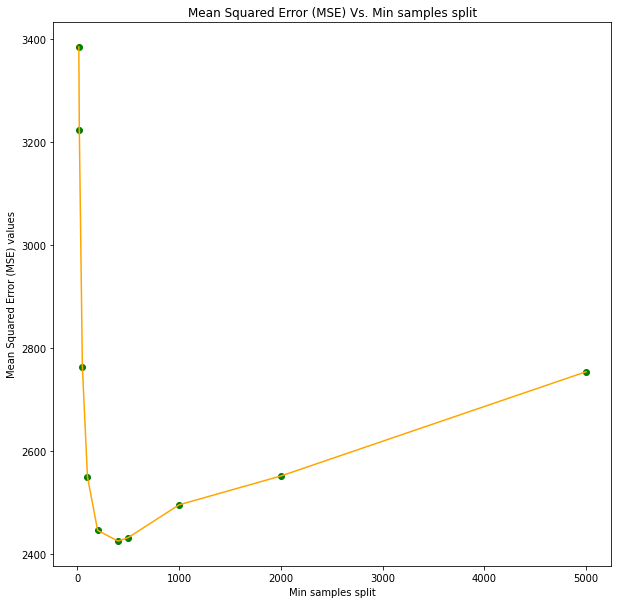

In [116]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_split_values, y = MSE_values, color = 'orange')
plt.scatter(x = min_samples_split_values, y = MSE_values, color = 'green')
plt.xlabel("Min samples split")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples split")
plt.show()

In [117]:
best_max_depth = 2
best_min_samples_split = 200
best_min_samples_leaves = 50

In [118]:
mode = DecisionTreeRegressor(max_depth = best_max_depth, min_samples_split = best_min_samples_split,
                            min_samples_leaf = best_min_samples_leaves)
model.fit(X_train_scaled, y_train)
y_prediction = model.predict(X_test_scaled)

In [119]:
mean_squared_error(y_predictions, y_test)

3217.974133407079

In [120]:
mean_absolute_error(y_predictions, y_test)

41.03603493969514

In [122]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predictions)

0.40600792968335664

In [123]:
def scatterplot_function_evaluation(x_value, y_value, fig_size = (10, 10), color = 'green', font_size = 15):
    plt.figure(figsize = fig_size)
    sns.scatterplot(x_value, y_value, color = color)
    plt.title('Y predictions Vs. Y actual', fontsize = font_size)
    plt.xlabel('Y predictions')
    plt.ylabel('Y actual') 
    plt.show()

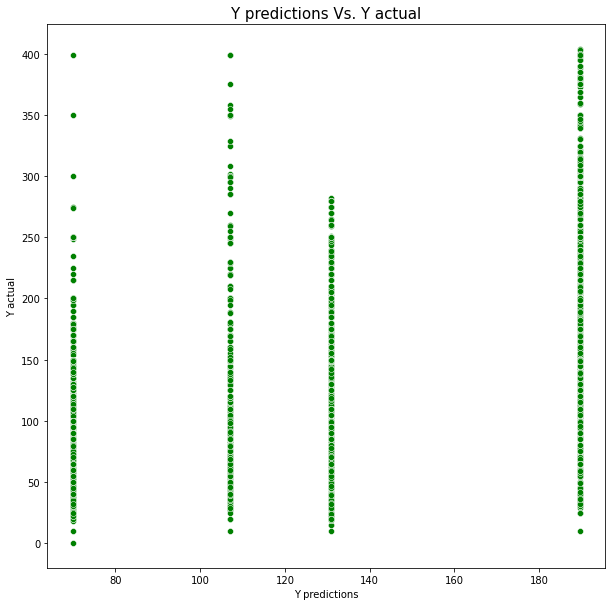

In [124]:
scatterplot_function_evaluation(y_predictions, y_test)

## Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
number_of_estimator_values = [100, 200, 400, 800]
cv = 2

## Creating an empty mean squared error list so that values could be stored later
MSE_values = []

## Creating an iterator to storing the values respectively. 
for number_of_estimator in tqdm(number_of_estimator_values):
    
    ## Creating an instance of a Random Forest Regressor so that it could be used for computation of cross-validation error
    model = RandomForestRegressor(n_estimators = number_of_estimator, random_state = 101, n_jobs = -1)
    
    ## Computing the cross validation error 
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    
    ## Appending the cross-validation error values to the list created above
    MSE_values.append(cross_validation_score)

100%|██████████| 4/4 [12:11<00:00, 182.79s/it]


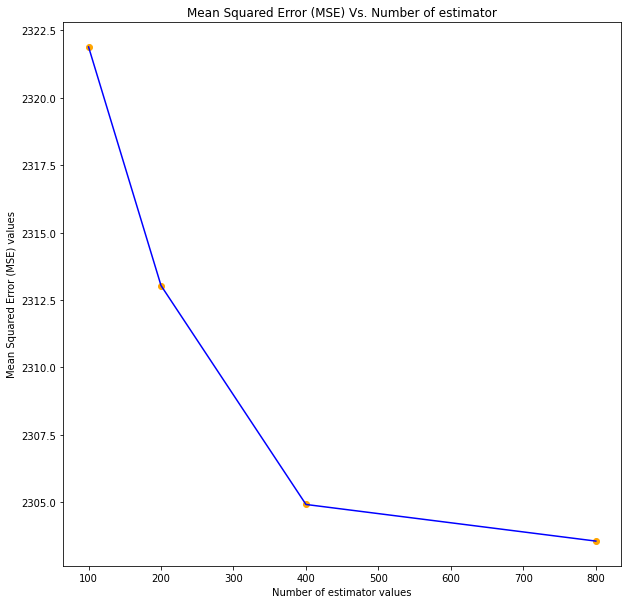

In [127]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_estimator_values, y = MSE_values, color = 'blue')
plt.scatter(x = number_of_estimator_values, y = MSE_values, color = 'orange')
plt.xlabel("Number of estimator values")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of estimator")
plt.show()

In [128]:
number_of_features_values = [1, 10, 12, 15, 20, 50, 100]
MSE_values = []
for number_of_features in tqdm(number_of_features_values):
    model = RandomForestRegressor(max_features = number_of_features, random_state = 101, n_jobs = -1)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_score)
    

100%|██████████| 7/7 [07:58<00:00, 68.42s/it]


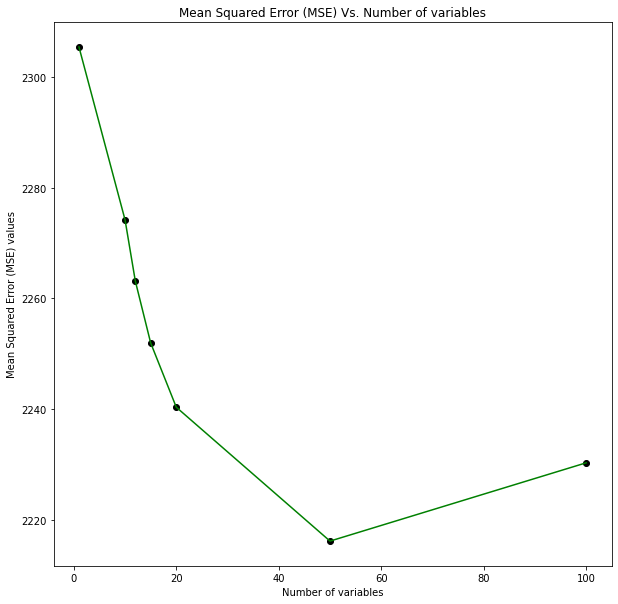

In [129]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = number_of_features_values, y = MSE_values, color = 'green')
plt.scatter(x = number_of_features_values, y = MSE_values, color = 'black')
plt.xlabel("Number of variables")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Number of variables")
plt.show()

In [130]:
best_number_of_estimators = 200
best_number_of_features = 50

In [131]:
model = RandomForestRegressor(max_features = best_number_of_features, n_estimators = best_number_of_estimators, n_jobs = -1)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [132]:
mean_squared_error(y_predictions, y_test)

2149.257271516245

In [133]:
mean_absolute_error(y_predictions, y_test)

32.4080896524915

In [134]:
r2_score(y_test,y_predictions)

0.6032778004342221

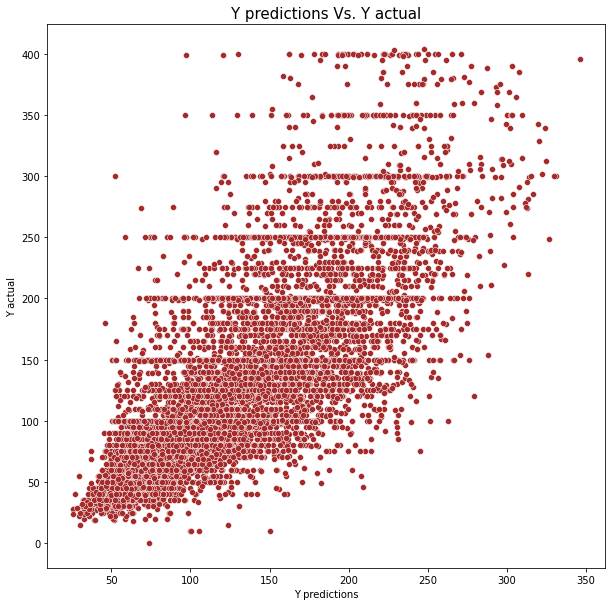

In [135]:
scatterplot_function_evaluation(y_predictions, y_test, color = 'brown', )

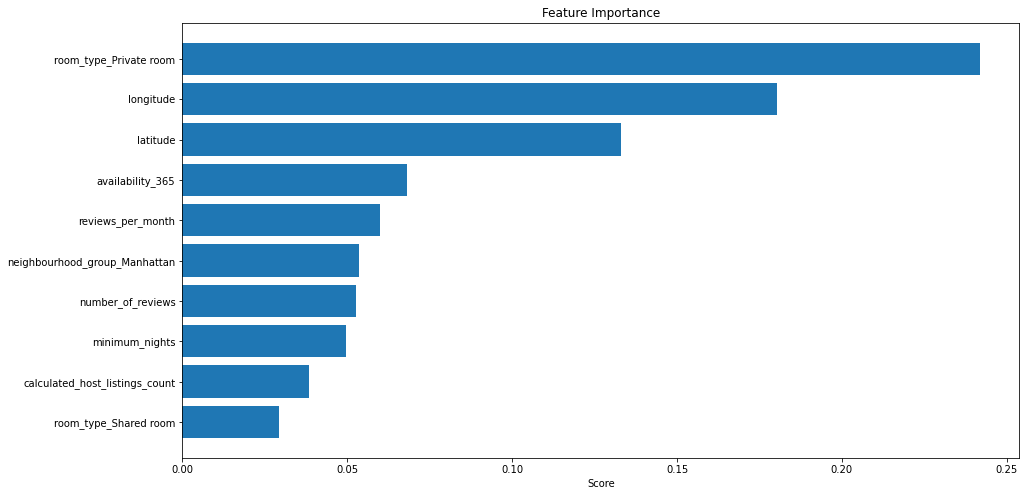

In [136]:
imp = pd.DataFrame({'Importance':model.feature_importances_, 'Features':X_train.columns}).sort_values(by='Importance',ascending=False).head(10).sort_values(by='Importance',ascending=True)

plt.figure(figsize=(15,8))
plt.barh(imp['Features'],imp['Importance'])
plt.title('Feature Importance')
plt.xlabel('Score')
plt.show()

## Gradient Boosting Regressor



In [137]:
from sklearn.ensemble import GradientBoostingRegressor

In [138]:
n_estimators = [10, 25, 50, 100, 150, 200]
cv = 2
cross_validation_score_values = []

## Iterating over all the elements from n_estimators
for estimators in tqdm(n_estimators):
    model = GradientBoostingRegressor(n_estimators = estimators)
    
    ## Taking the mean of the cross validation score for k folds 
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)
    

100%|██████████| 6/6 [02:47<00:00, 27.87s/it]


In [139]:
def lineplot_function(x_label, y_label, x_value, y_value, color1 = 'green', color2 = 'blue', figsize = (10, 10)):
    """
    Takes the x values and y values and plots the lineplot along with scatterplot
    """
    plt.figure(figsize = figsize)
    sns.lineplot(x = x_value, y = y_value, color = color1)
    sns.scatterplot(x = x_value, y = y_value, color = color2)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.title(f'{x_label} Vs. {y_label} values', fontsize = 15)
    plt.show()

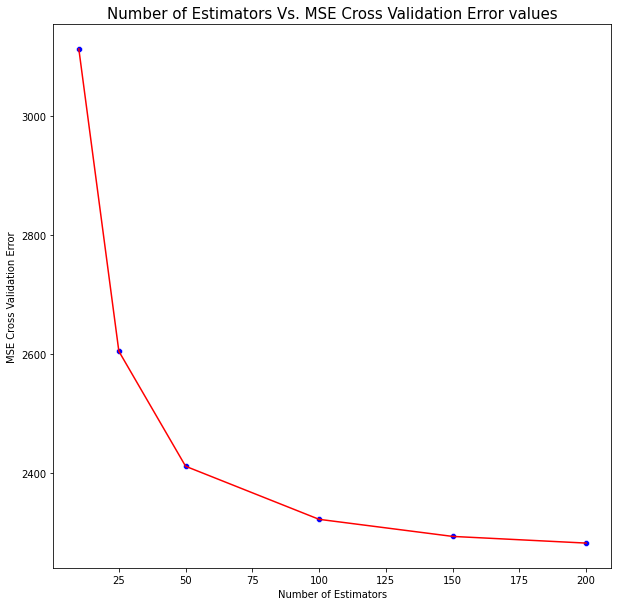

In [140]:
lineplot_function(x_value = n_estimators, y_value = cross_validation_score_values, x_label = "Number of Estimators",
                 y_label = "MSE Cross Validation Error", color1 = "red")

In [141]:
max_depth_values = [1, 2, 3, 5, 7, 10]
cv = 10

cross_validation_score_values = []

for max_depth in tqdm(max_depth_values):
    model = GradientBoostingRegressor(max_depth = max_depth, n_estimators = 10)
    cross_validation_score = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    cross_validation_score_values.append(cross_validation_score)

100%|██████████| 6/6 [03:43<00:00, 37.22s/it]


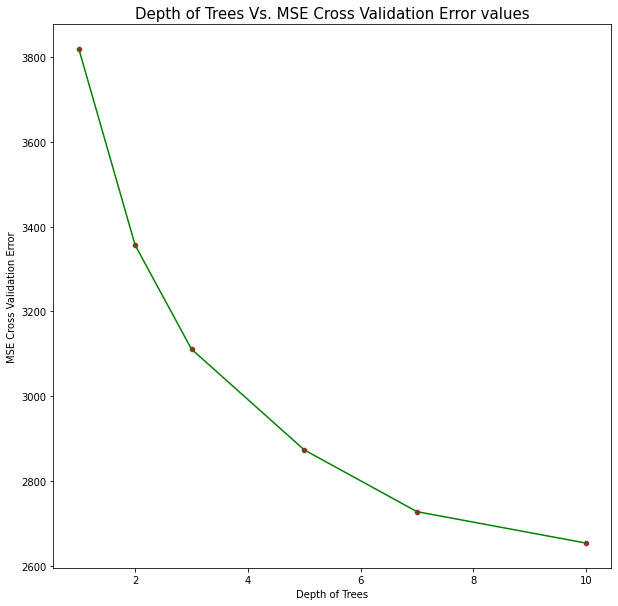

In [142]:
## Using the lineplot function to plot the performance measures of the gradient boosting regressor algorithm
lineplot_function(x_value = max_depth_values, y_value = cross_validation_score_values, x_label = "Depth of Trees",
                 y_label = "MSE Cross Validation Error", color1 = "green", color2 = "brown")

In [143]:
best_max_depth = 10
best_estimators = 200

In [144]:
model = GradientBoostingRegressor(n_estimators = best_estimators, max_depth = 10)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [145]:
mean_squared_error(y_predictions, y_test)

2192.815869245068

In [146]:
mean_absolute_error(y_predictions, y_test)

32.774004825369744

In [147]:
r2_score(y_test,y_predictions)

0.5952375053378661

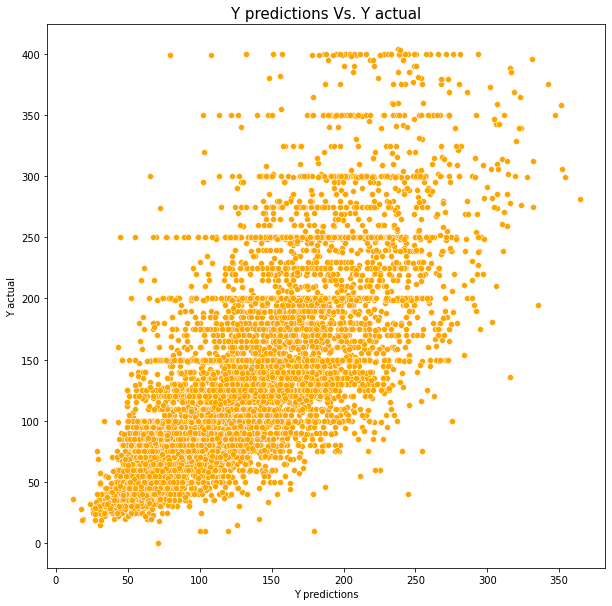

In [148]:
scatterplot_function_evaluation(y_predictions, y_test, color = 'orange')

## Deep Learning Model

In [149]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [150]:
n_columns = len(X_train_scaled[0])

In [151]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))
# model.add(Dense(10, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [152]:
X_train.dtypes

latitude                   float64
longitude                  float64
minimum_nights               int64
number_of_reviews            int64
reviews_per_month          float64
                            ...   
neighbourhood_Woodhaven      uint8
neighbourhood_Woodlawn       uint8
neighbourhood_Woodside       uint8
room_type_Private room       uint8
room_type_Shared room        uint8
Length: 229, dtype: object

In [ ]:
model.fit(np.asarray(X_train).astype(np.float32), y_train, epochs = 10, batch_size = 10)

Epoch 1/10
3873/3873 [==============================] - 8s 2ms/step - loss: 9980.6777 - mean_absolute_error: 69.8137
Epoch 2/10
3873/3873 [==============================] - 8s 2ms/step - loss: 7486.5771 - mean_absolute_error: 56.3857
Epoch 3/10
3873/3873 [==============================] - 7s 2ms/step - loss: 6815.9121 - mean_absolute_error: 52.9212
Epoch 4/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6671.7456 - mean_absolute_error: 51.8577
Epoch 5/10
3873/3873 [==============================] - 7s 2ms/step - loss: 6585.5078 - mean_absolute_error: 51.3820
Epoch 6/10
3873/3873 [==============================] - 7s 2ms/step - loss: 6501.8159 - mean_absolute_error: 50.8432
Epoch 7/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6451.2456 - mean_absolute_error: 50.5345
Epoch 8/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6403.9336 - mean_absolute_error: 50.2691
Epoch 9/10
3873/3873 [==============================] - 7s 2ms/s

In [ ]:
y_predictions = model.predict(np.asarray(X_test).astype(np.float32))

In [ ]:
mean_squared_error(y_predictions, y_test)

6276.718438005004

In [ ]:
mean_absolute_error(y_predictions, y_test)

53.994901622231986

In [ ]:
r2_score(y_test,y_predictions)

0.39976255941824246

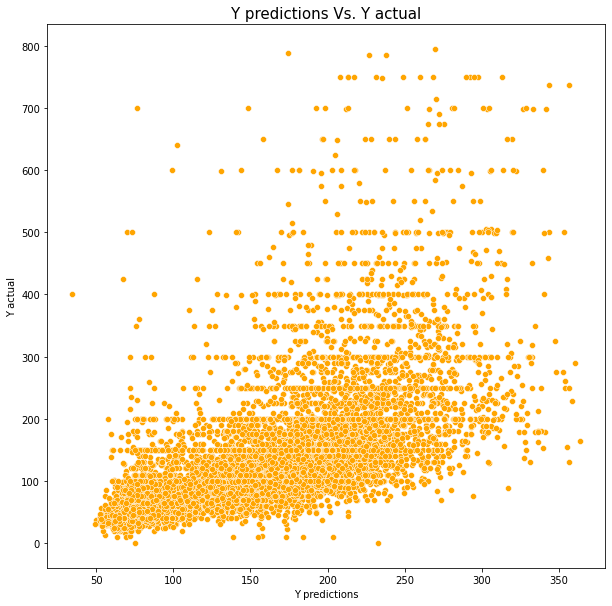

In [ ]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color = 'orange')

In [ ]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))

model.add(Dense(10, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [ ]:
model.fit(np.asarray(X_train).astype(np.float32), y_train, epochs = 10, batch_size = 10)

Epoch 1/10
3873/3873 [==============================] - 9s 2ms/step - loss: 10044.6406 - mean_absolute_error: 70.3168
Epoch 2/10
3873/3873 [==============================] - 8s 2ms/step - loss: 7534.0073 - mean_absolute_error: 56.5466
Epoch 3/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6845.8999 - mean_absolute_error: 52.5672
Epoch 4/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6659.8262 - mean_absolute_error: 51.5505
Epoch 5/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6590.5127 - mean_absolute_error: 51.1209
Epoch 6/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6494.4429 - mean_absolute_error: 50.6521
Epoch 7/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6457.9414 - mean_absolute_error: 50.3321
Epoch 8/10
3873/3873 [==============================] - 8s 2ms/step - loss: 6382.1650 - mean_absolute_error: 50.0313
Epoch 9/10
3873/3873 [==============================] - 8s 2ms/

In [ ]:
y_predictions = model.predict(np.asarray(X_test).astype(np.float32))

In [ ]:
mean_squared_error(y_predictions, y_test)

6043.145204223995

In [ ]:
mean_absolute_error(y_predictions, y_test)

46.00415721578473

In [ ]:
r2_score(y_test,y_predictions)

0.4220989763561477

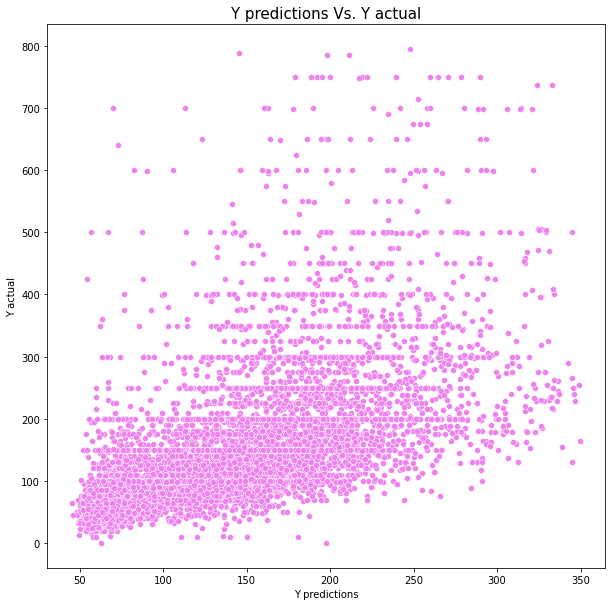

In [ ]:
scatterplot_function_evaluation(y_predictions.flatten(), y_test, color = 'violet')

In [ ]:
## Creating a sequential instance 
model = Sequential()

## Creating a hidden layer of size 100 and activation to be relu
model.add(Dense(100, activation = 'relu', input_shape = (n_columns,)))

## Creating a hidden layer of size 50 and activation to be relu 
model.add(Dense(50, activation = 'relu'))

model.add(Dense(20, activation = 'relu'))

## Creating a densely connected layer with one unit as the output and the activation is linear 
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [ ]:
model.fit(np.asarray(X_train).astype(np.float32), y_train, epochs = 30, batch_size = 10)

Epoch 1/30
3873/3873 [==============================] - 9s 2ms/step - loss: 9822.6387 - mean_absolute_error: 69.0061
Epoch 2/30
3873/3873 [==============================] - 8s 2ms/step - loss: 7321.6235 - mean_absolute_error: 55.2094
Epoch 3/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6844.5620 - mean_absolute_error: 52.3551
Epoch 4/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6719.9878 - mean_absolute_error: 51.6786
Epoch 5/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6598.1851 - mean_absolute_error: 51.1668
Epoch 6/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6465.7061 - mean_absolute_error: 50.4573
Epoch 7/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6465.5703 - mean_absolute_error: 50.6038
Epoch 8/30
3873/3873 [==============================] - 8s 2ms/step - loss: 6406.0396 - mean_absolute_error: 50.1226
Epoch 9/30
3873/3873 [==============================] - 8s 2ms/s

In [ ]:
y_predictions = model.predict(np.asarray(X_test).astype(np.float32))

In [ ]:
mean_squared_error(y_predictions, y_test)

6174.573906161428

In [ ]:
mean_absolute_error(y_predictions, y_test)

52.96794420874152

In [ ]:
r2_score(y_test,y_predictions)

0.4095305572930519